In [2]:
import pandas as pd
%matplotlib inline
import matplotlib as plt
pd.set_option("display.max_columns",999)
import numpy as np
import json

In [3]:
df_full = pd.read_pickle("../pickles/cuentalo_json_con_pais_ciudad_limpios.pkl")

In [4]:
df_full.head()

,country,created_at,favorite_count,full_text,id,lat,location,lon,parent_country,parent_created_at,parent_favorite_count,parent_full_text,parent_id,parent_lat,parent_location,parent_lon,parent_place,parent_quote_count,parent_retweet_count,parent_time_zone,parent_user_created_at,parent_user_followers_count,parent_user_id,parent_user_name,parent_user_screen_name,parent_user_statuses_count,place,quote_count,retweet_count,time_zone,tweet_type,user_created_at,user_followers_count,user_id,user_name,user_screen_name,user_statuses_count,ciudad_clean,pais_clean,location_diagnosis,parent_ciudad_clean,parent_pais_clean,parent_location_diagnosis
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
990380137937035265,None,2018-04-28 23:59:59,0,RT @Odi_sea: Con 17 años desde una cena de gra...,990380137937035265,-999.0,Venezuela,-999.0,None,2018-04-28 00:41:56,4681,Con 17 años desde una cena de graduación un ho...,990028305704333312,-999.0,,-999.0,None,-1,3176,Amsterdam,2010-02-08 21:47:07,301,112541236,Odisea,Odi_sea,23649,None,-1,3176,Caracas,retweet,2012-07-16 05:04:26,1839,636716479,한제원,OrianaDiAmeliee,48132,NaN,Venezuela,3.0,NaN,NaN,-1.0
990380135638593538,None,2018-04-28 23:59:59,0,RT @__Kylene: Demos voz y apoyo a esta compañe...,990380135638593538,-999.0,"Baker Street, London.",-999.0,None,2018-04-28 14:57:54,1702,Demos voz y apoyo a esta compañera que me ha p...,990243714584010752,-999.0,Lleida,-999.0,None,-1,1208,Athens,2012-09-10 10:06:38,2483,814900356,Killjoy.,__Kylene,68443,None,-1,1208,None,retweet,2012-04-05 20:09:12,249,546250792,Alannih 💝💛💜,alannih,9376,London,Reino Unido,5.0,Lleida,España,5.0
990380135500181505,None,2018-04-28 23:59:59,0,RT @AlejandraTuk: Mi marido me maltrata.\nPido...,990380135500181505,-999.0,,-999.0,None,2018-04-28 20:21:05,30285,Mi marido me maltrata.\nPido el divorcio.\nEl ...,990325049893801984,-999.0,Latinoamérica Libre ☭,-999.0,None,-1,17406,Eastern Time (US & Canada),2012-03-19 18:10:51,5824,529588816,Mala.,AlejandraTuk,40025,None,-1,17406,None,retweet,2016-11-09 03:38:17,132,796195177400532993,Diana Carolina Carre,DiKa2Pa21,10839,NaN,NaN,-1.0,NaN,NaN,-2.0
990380134715871233,None,2018-04-28 23:59:59,0,RT @Antiintermedio: ¿Sabéis dónde estaban hace...,990380134715871233,-999.0,"Cáceres, España",-999.0,None,2018-04-27 21:50:49,1621,¿Sabéis dónde estaban hace 4 años y medio los ...,989985242713919488,-999.0,En el combate metapolítico,-999.0,None,-1,1322,None,2014-02-15 23:56:08,18184,2345903802,El Antiintermedio,Antiintermedio,46874,None,-1,1322,None,retweet,2017-12-01 11:24:57,213,936556720670863360,Francisco,FranciscoJMArau,41093,Cáceres,España,12.0,NaN,NaN,-2.0
990380130362187776,None,2018-04-28 23:59:58,0,RT @Soy_Arbitra: Estar en un campo de fútbol a...,990380130362187776,-999.0,"Vallecas, Madrid",-999.0,None,2018-04-28 16:07:55,958,"Estar en un campo de fútbol arbitrando, escuch...",990261338810257408,-999.0,España,-999.0,None,-1,573,Athens,2013-06-22 12:57:31,1676,1538698825,Soy Árbitra,Soy_Arbitra,2682,None,-1,573,None,retweet,2014-08-05 18:53:57,41,2734383970,angelamesa_,geeeelaaaaa,209,Madrid,España,5.0,NaN,España,3.0


# tweets mas retuiteados

In [9]:
grouped_retweets=df_full.groupby('parent_id')

In [4]:
retweeted_ids_with_maxcounts=grouped_retweets['retweet_count'].max()

In [5]:
corte=2500
most_rts=df_full[df_full.id.isin(retweeted_ids_with_maxcounts[retweeted_ids_with_maxcounts>corte].index)].sort_values('retweet_count',ascending=False)
print ("Tweets con mas de ",corte,"retweets:",len(most_rts))
most_rts.full_text=most_rts.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
most_rts.parent_full_text=most_rts.parent_full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
most_rts[['user_followers_count','retweet_count','favorite_count','user_screen_name']]

Tweets con mas de  2500 retweets: 150


,user_followers_count,retweet_count,favorite_count,user_screen_name
tweet_id,,,,
990201907456208896,1148,54705,71796,martolius
991217730601848834,2543,44150,63430,micaserrano23
991464409825505280,2238,33892,34689,viickymonti
990818114995703808,591,22633,32814,rg_vianca
990775116807229440,718,20483,58393,sabri_barra
990779462273953794,1344,17764,63256,cchaconj
990325049893801984,5825,17472,30484,AlejandraTuk
991034153268383751,761,17195,51220,santygom3z
990864702011006977,386,16094,23308,victoriaEacosta


In [6]:
most_rts.to_excel("../intermediate_data/tweets_mas_rt.xls")

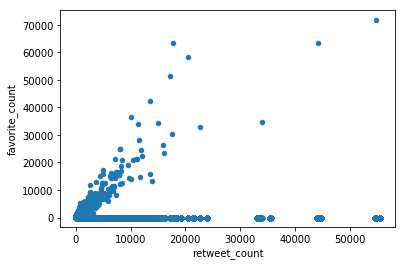

In [7]:
df_full.favorite_count=df_full.fillna(-1).favorite_count.astype(np.int32)
df_full[['favorite_count','retweet_count']].plot.scatter(x='retweet_count',y='favorite_count')

# Barcelona

In [10]:
# rts en barcelona 
rts_bcn = df_full[(df_full.ciudad_clean=='Barcelona') & (df_full.tweet_type=='retweet')].copy()
rts_bcn.full_text = rts_bcn.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
rts_bcn.parent_full_text=rts_bcn.parent_full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
#rts_bcn.to_excel("retweets_en_barcelona.xlsx")

In [11]:
# tweets originales de usuarios en barcelona
tweets_de_bcn = df_full[(df_full.ciudad_clean=='Barcelona') & (df_full.tweet_type!='retweet')].copy()
tweets_de_bcn.full_text = tweets_de_bcn.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
tweets_de_bcn.parent_full_text=tweets_de_bcn.parent_full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
#tweets_de_bcn.to_excel("tweets_de_barcelona.xlsx")

In [12]:
# ids de los tweets originales de Barcelona, a ver cuales tenemos en la DB
ids_retweeteds_from_barcelona = df_full[df_full.parent_ciudad_clean=='Barcelona'][['id','parent_id']].groupby('parent_id').count().sort_values(by='id',ascending=False).index.values

In [13]:
df_full[df_full.id.isin(ids_retweeteds_from_barcelona)].sort_values(by="retweet_count",ascending=False)

,country,created_at,favorite_count,full_text,id,lat,location,lon,parent_country,parent_created_at,parent_favorite_count,parent_full_text,parent_id,parent_lat,parent_location,parent_lon,parent_place,parent_quote_count,parent_retweet_count,parent_time_zone,parent_user_created_at,parent_user_followers_count,parent_user_id,parent_user_name,parent_user_screen_name,parent_user_statuses_count,place,quote_count,retweet_count,time_zone,tweet_type,user_created_at,user_followers_count,user_id,user_name,user_screen_name,user_statuses_count,ciudad_clean,pais_clean,location_diagnosis,parent_ciudad_clean,parent_pais_clean,parent_location_diagnosis
tweet_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
989943909315940353,None,2018-04-27 19:06:34,10560,Tengo 32 años y me despierto con miedo cuando ...,989943909315940353,-999.0,Barcelona,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,4621,Athens,original,2011-05-09 06:51:46,765,295537621,Paula Borja,pau_borja,1912,Barcelona,España,9.000,NaN,NaN,NaN
990160880682889217,None,2018-04-28 09:28:44,5178,Sabéis que tienen en común todos los tíos que ...,990160880682889217,-999.0,"Barcelona, Catalunya",-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,2367,None,original,2018-03-23 23:11:27,2401,977321957912993792,Aka bxrgerqueen,_chocoqueen,2954,Barcelona,España,4.000,NaN,NaN,NaN
989864640887902209,None,2018-04-27 13:51:35,5360,"Mi madre me explicaba que en su ciudad, cuando...",989864640887902209,-999.0,Barcelona,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,2323,Pacific Time (US & Canada),original,2014-01-27 11:14:49,17299,2313471692,Ana Bolena,mantonieta1536,52470,Barcelona,España,9.000,NaN,NaN,NaN
989952859176349696,None,2018-04-27 19:42:08,5224,Todos los hombres hemos cometido algún tipo de...,989952859176349696,-999.0,Barcelona-Cádiz,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,1732,Greenland,original,2009-12-03 13:05:11,59395,94324983,Fonsi Loaiza,FonsiLoaiza,79054,Barcelona,España,19.500,NaN,NaN,NaN
990350573215059968,None,2018-04-28 22:02:31,5143,Me escribís algunas angustiadas porque no que...,990350573215059968,-999.0,Málaga - Barcelona,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,1429,Greenland,original,2009-08-19 23:53:57,26918,67165437,Ana I.Bernal-Triviño,anaisbernal,121592,Barcelona,España,19.500,NaN,NaN,NaN
991622597933780992,None,2018-05-02 10:17:05,951,El retrógrado Alfonso Ussía recibe hoy la meda...,991622597933780992,-999.0,Barcelona-Cádiz,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,953,Greenland,original,2009-12-03 13:05:11,59732,94324983,Fonsi Loaiza,FonsiLoaiza,79149,Barcelona,España,19.500,NaN,NaN,NaN
989983536777236482,None,2018-04-27 21:44:02,2126,¿Y cuántas veces habéis acabado de follar solo...,989983536777236482,-999.0,Barcelona.,-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,938,Pacific Time (US & Canada),original,2016-06-18 18:10:41,3173,744230870937141248,Judit.,femilinda_,30315,Barcelona,España,9.000,NaN,NaN,NaN
990285456494522368,None,2018-04-28 17:43:46,1681,"18 años, volvía de fiesta, un hombre la llama ...",990285456494522368,-999.0,"Barcelona, España",-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,877,None,original,2017-08-29 12:37:04,13,902510409269305348,LV,lauravivesf,6,Barcelona,España,12.000,NaN,NaN,NaN
990217327609294849,None,2018-04-28 13:13:02,1260,Es sorprendente que muchas que leemos #Cuental...,990217327609294849,-999.0,"Barcelona, Catalunya",-999.0,None,NaT,-1,None,0,-999.0,None,-999.0,None,-1,-1,None,NaT,-1,0,None,None,-1,None,-1,693,Madrid,original,2011-10-29 14:57:48,3050,400766668,Her,_hherol,50559,Barcelona,España,4.000,NaN,NaN,NaN


In [14]:
df_bcn = df_full[df_full.id.isin(ids_retweeteds_from_barcelona)].sort_values(by="retweet_count",ascending=False)

In [15]:
df_bcn.retweet_count.sum()

30643

# Locations de tweets

In [5]:
contenido = df_full[df_full.tweet_type!='retweet']
retweets = df_full[df_full.tweet_type=='retweet']

In [22]:
cuenta_pais = pd.DataFrame()
cuenta_pais['originales'] = contenido.groupby('pais_clean')['id'].count().sort_values(ascending=False)
total = cuenta_pais['originales'].sum()
cuenta_pais['porcentaje'] = 100*cuenta_pais['originales']/total
cuenta_pais.head(15)

,originales,porcentaje
pais_clean,,
España,29088,36.925889
Argentina,24243,30.775383
Colombia,5536,7.027699
México,4125,5.236499
Chile,3266,4.146038
Estados Unidos,1682,2.135222
Perú,1388,1.762003
Uruguay,1253,1.590626
Venezuela,1237,1.570315


In [23]:
cuenta_pais = pd.DataFrame()
cuenta_pais['originales'] = retweets.groupby('pais_clean')['id'].count().sort_values(ascending=False)
total = cuenta_pais['originales'].sum()
cuenta_pais['porcentaje'] = 100*cuenta_pais['originales']/total
cuenta_pais.head(15)

,originales,porcentaje
pais_clean,,
Argentina,491751,44.747105
España,272911,24.833660
Chile,54200,4.931954
México,52392,4.767434
Colombia,48257,4.391168
Uruguay,24394,2.219743
Estados Unidos,21773,1.981244
Puerto Rico,18045,1.642013
Venezuela,16452,1.497057


In [24]:
cuenta_pais = pd.DataFrame()
cuenta_pais['retweets'] = retweets.groupby('pais_clean')['id'].count().sort_values(ascending=False)
cuenta_pais['originales'] = contenido.groupby('pais_clean')['id'].count().sort_values(ascending=False)
cuenta_pais['porcentaje_originales'] = 100*cuenta_pais['originales']/cuenta_pais['originales'].sum()
cuenta_pais['porcentaje_retweets'] = 100*cuenta_pais['retweets']/total

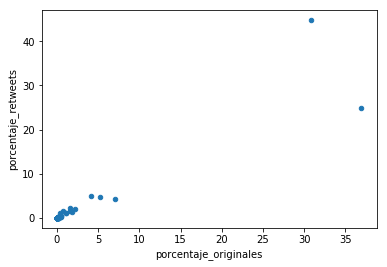

In [25]:
cuenta_pais.plot.scatter(x='porcentaje_originales',y='porcentaje_retweets')

In [30]:
(cuenta_pais[cuenta_pais.retweets>1000]['porcentaje_originales']/cuenta_pais[cuenta_pais.retweets>1000]['porcentaje_retweets']).sort_values(ascending=False)

pais_clean
Francia           1.694244
Guatemala         1.683377
Reino Unido       1.639173
El Salvador       1.609763
Colombia          1.600478
España            1.486986
Perú              1.354152
Italia            1.144068
Panamá            1.133099
México            1.098431
Costa Rica        1.080201
Estados Unidos    1.077759
Canadá            1.059440
Venezuela         1.048975
Cuba              1.045924
Ecuador           0.985079
Filipinas         0.953050
Brasil            0.898843
Chile             0.840680
Japón             0.822065
San Martín        0.733718
Uruguay           0.716609
Argentina         0.687789
Nicaragua         0.484878
Puerto Rico       0.418268
Paraguay          0.289467
dtype: float64

# Grabar muestra de tweets aleatorios para gente del grupo

In [122]:
NUMERO_DE_TWEETS_POR_PERSONA = 5000
# tweets originales solamente
tweets_originales = df_full[(df_full.tweet_type=='original')].copy()
tweets_originales.full_text = tweets_originales.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
tweets_originales.id = tweets_originales.id.apply(str)
#people = ['Patricio','Laura','Maria','Diana','Guillermo','Sol','Luz','David','Feliu','Artur','Irene','Carlos (C)','Carlos (G)','Fer','Juan','Camilo']
#people.sort()
people = [str(x) for x in range(1,6)]
writer = pd.ExcelWriter('categorization_externa.xlsx')
for p in people:
    subset = tweets_originales.sample(n=NUMERO_DE_TWEETS_POR_PERSONA)
    subset=subset[['id','user_name','full_text']]
    subset.to_excel(writer,sheet_name=p)
writer.save()

/Users/fcucchietti/anaconda3/lib/python3.6/site-packages/xlsxwriter/worksheet.py:832: UserWarning: Ignoring URL 'https://t.co/1PbotmoCe6%20@%20' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
/Users/fcucchietti/anaconda3/lib/python3.6/site-packages/xlsxwriter/worksheet.py:832: UserWarning: Ignoring URL 'https://t.co/mjDqGvtqfy..' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))


# Export to JSON for vis

In [98]:
summary = df_full[df_full.tweet_type!='retweet'][['id','parent_id','created_at','pais_clean','user_followers_count','retweet_count','full_text','tweet_type']].copy()
# cambiar enters por puntos
summary.full_text=summary.full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
#summary.parent_full_text=summary.parent_full_text.apply(lambda x: x.replace('\n', '.') if x!=None else None)
summary.head()

,id,parent_id,created_at,pais_clean,user_followers_count,retweet_count,full_text,tweet_type
tweet_id,,,,,,,,
990380122082611200,990380122082611200,0,2018-04-28 23:59:56,NaN,78,0,17 años.Vuelvo a casa con miedo. Se me acerca ...,original
990380087559315456,990380087559315456,990379489371807744,2018-04-28 23:59:47,NaN,173,1,Cuando cortamos estaba tan destrozada que llev...,reply
990380024703447040,990380024703447040,0,2018-04-28 23:59:32,NaN,223,0,#Cuéntalo como hacéis las lentejas?,original
990380009549434882,990380009549434882,0,2018-04-28 23:59:29,NaN,1196,0,un grupo de amigas nos reunimos y salio la pla...,original
990380001202761728,990380001202761728,0,2018-04-28 23:59:27,España,309,3,Volvía a casa de la universidad. En el autobús...,original


In [99]:
summary['x']=(summary.created_at-summary.created_at.min())/(summary.created_at.max()-summary.created_at.min())

In [100]:
g=summary.groupby('x')

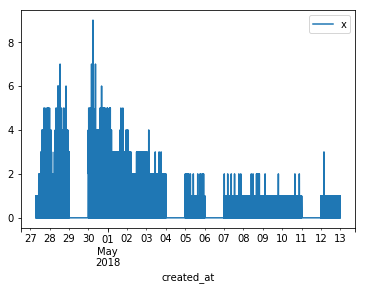

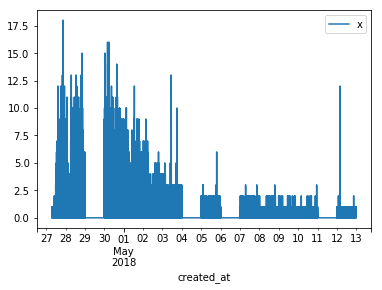

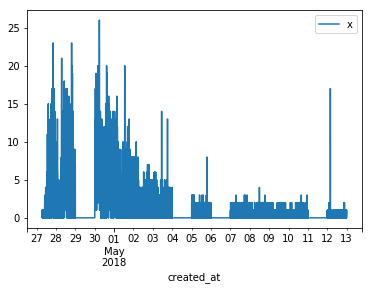

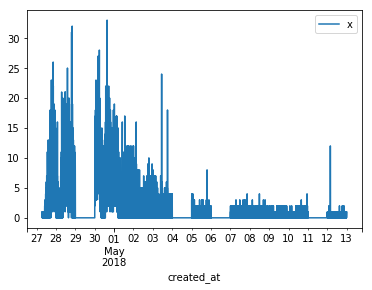

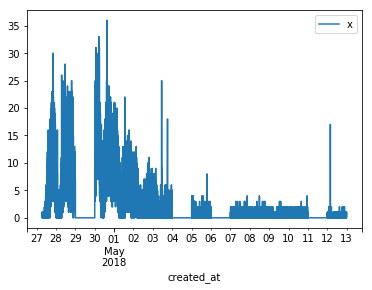

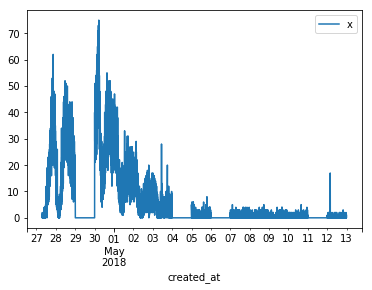

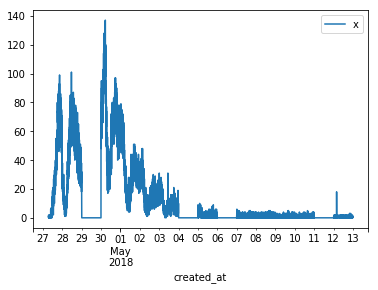

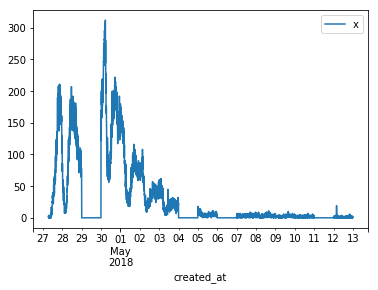

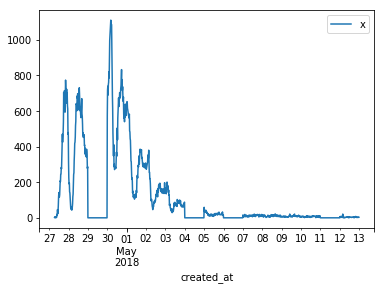

In [104]:
summary[['x','created_at']].set_index('created_at').resample('1s').count().plot()
summary[['x','created_at']].set_index('created_at').resample('5s').count().plot()
summary[['x','created_at']].set_index('created_at').resample('10s').count().plot()
summary[['x','created_at']].set_index('created_at').resample('15s').count().plot()
summary[['x','created_at']].set_index('created_at').resample('20s').count().plot()
summary[['x','created_at']].set_index('created_at').resample('60s').count().plot()
summary[['x','created_at']].set_index('created_at').resample('120s').count().plot()
summary[['x','created_at']].set_index('created_at').resample('300s').count().plot()
summary[['x','created_at']].set_index('created_at').resample('1200s').count().plot()

In [103]:
(summary.created_at.max()-summary.created_at.min()).total_seconds()/300

4523.55

In [33]:
from datetime import timedelta

In [105]:
step=timedelta(0,300)
start=summary.created_at.min()
end=summary.created_at.min()+step
summary['y']=0
MAXY = 300
while(start<summary.created_at.max()):
    window=summary[(summary.created_at>=start)&(summary.created_at<end)]
    summary.loc[window.index,'y']=[ (x-MAXY/2)/MAXY for x in range(len(window.index))]
    start=end
    end = min(end+step,summary.created_at.max())

In [106]:
summary['minute']=summary['created_at'].dt.round('5min')
grouped = summary[['minute','id']].groupby('minute')

In [107]:
summary['y']=grouped.transform(lambda group: [ (x-(len(group)-1)/2)/(MAXY-1) for x in range(len(group))])

In [108]:
summary.head()

,id,parent_id,created_at,pais_clean,user_followers_count,retweet_count,full_text,tweet_type,x,y,minute
tweet_id,,,,,,,,,,,
990380122082611200,990380122082611200,0,2018-04-28 23:59:56,NaN,78,0,17 años.Vuelvo a casa con miedo. Se me acerca ...,original,0.109052,-0.046823,2018-04-29
990380087559315456,990380087559315456,990379489371807744,2018-04-28 23:59:47,NaN,173,1,Cuando cortamos estaba tan destrozada que llev...,reply,0.109046,-0.043478,2018-04-29
990380024703447040,990380024703447040,0,2018-04-28 23:59:32,NaN,223,0,#Cuéntalo como hacéis las lentejas?,original,0.109035,-0.040134,2018-04-29
990380009549434882,990380009549434882,0,2018-04-28 23:59:29,NaN,1196,0,un grupo de amigas nos reunimos y salio la pla...,original,0.109032,-0.036789,2018-04-29
990380001202761728,990380001202761728,0,2018-04-28 23:59:27,España,309,3,Volvía a casa de la universidad. En el autobús...,original,0.109031,-0.033445,2018-04-29


In [109]:
retweets={}
for idx,row in summary.iterrows():
    if row.parent_id:
        if row.parent_id in retweets:
            retweets[row.parent_id].append(idx)
        else:
            retweets[row.parent_id]=[idx]

In [110]:
alltweets=[]
for idx,row in summary.iterrows():
    tweet={"tweetId": idx,"position": [row.x,row.y]}
    if idx in retweets:
        tweet['listOfRetweets'] = [{"tweetId": t} for t in retweets[idx]]
    else:
        tweet['listOfRetweets'] = []
    alltweets.append(tweet)

In [78]:
import json

In [111]:
a=json.dumps(alltweets)
fo=open("./summary_xy.json",'w')
fo.write(a)

15957054

In [112]:
alltweets[:10]

[{'tweetId': 990380122082611200,
  'position': [0.10905225615574789, -0.046822742474916385],
  'listOfRetweets': []},
 {'tweetId': 990380087559315456,
  'position': [0.10904562419633547, -0.043478260869565216],
  'listOfRetweets': []},
 {'tweetId': 990380024703447040,
  'position': [0.10903457093064813, -0.04013377926421405],
  'listOfRetweets': []},
 {'tweetId': 990380009549434882,
  'position': [0.10903236027751066, -0.03678929765886288],
  'listOfRetweets': []},
 {'tweetId': 990380001202761728,
  'position': [0.10903088650875234, -0.033444816053511704],
  'listOfRetweets': []},
 {'tweetId': 990379997876678657,
  'position': [0.10903014962437318, -0.030100334448160536],
  'listOfRetweets': []},
 {'tweetId': 990379986564669441,
  'position': [0.10902793897123572, -0.026755852842809364],
  'listOfRetweets': []},
 {'tweetId': 990379972601745408,
  'position': [0.10902572831809824, -0.023411371237458192],
  'listOfRetweets': []},
 {'tweetId': 990379948866195456,
  'position': [0.10902130

In [114]:
summary.to_csv("originals.csv")
summary.to_excel("originals.xlsx")

/Users/fcucchietti/anaconda3/lib/python3.6/site-packages/xlsxwriter/worksheet.py:832: UserWarning: Ignoring URL 'https://t.co/kgRKokHvYd%20culpa:%20se%20buscan%20razones%20para%20“calmar”%20a%20nuestro%20cerebro%20de%20que%20existió%20algo%20que%20nos%20quitó%20el%20control%20del%20medio%20externo.Siempre%20se%20da%20pq%20la%20importancia%20de%20la%20supervivencia%20y%20el%20control%20es%20%20superior%20aún%20a%20los%20terribles%20sentimientos%20de%20culpa..' with link or location/anchor > 255 characters since it exceeds Excel's limit for URLS
  force_unicode(url))
/Users/fcucchietti/anaconda3/lib/python3.6/site-packages/xlsxwriter/worksheet.py:832: UserWarning: Ignoring URL 'https://t.co/xvYTxjPkMr%20Bah,%20era%20una%20mimosería%20infantil%20a%20decibelios,%20los%20vecinos%20del%20diario%20de%20avisos%20llamaron%20y%20vinieron%20y%20yo%20tenía%20unas%20muletas%20porque%20me%20había%20cortado%20con%20una%20botella%20de%20dorada%20y%20la%20camisa%20del%20poli%20estaba%20de%20lejia%20' w

In [24]:
len(summary.pais_clean.unique())

206

In [29]:
summary.groupby('pais_clean').count().id.sort_values(ascending=False)

pais_clean
Argentina                               515994
España                                  301999
Chile                                    57466
México                                   56517
Colombia                                 53793
Uruguay                                  25647
Estados Unidos                           23455
Puerto Rico                              18586
Venezuela                                17689
Perú                                     15688
Paraguay                                 13529
Ecuador                                  12403
Costa Rica                               12343
Brasil                                    5799
Panamá                                    4686
Reino Unido                               3833
Guatemala                                 2712
Nicaragua                                 2620
Filipinas                                 2596
El Salvador                               2175
Francia                                   2087
It

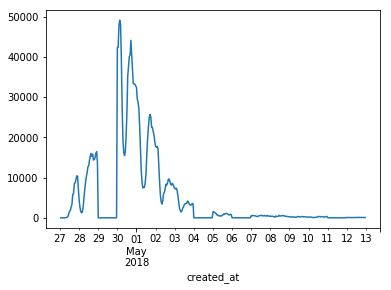

In [94]:
pd.set_option('display.max_rows', 10000)
df_full[df_full.tweet_type=="retweet"].set_index('created_at').resample('1h')['id'].count().plot()

In [90]:
df_full.tweet_type.unique()

array(['retweet', 'original', 'reply', 'quote'], dtype=object)